In [1]:
import torch
import os
from IPython.display import Image, clear_output

print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Setup complete. Using torch 2.1.0+cu121 (Tesla T4)


In [14]:
!unzip -q /content/pcbdataset.zip -d /content/pcbdataset

In [3]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 16388, done.
remote: Counting objects: 100% (282/282), done.
remote: Compressing objects: 100% (211/211), done.
remote: Total 16388 (delta 139), reused 153 (delta 71), pack-reused 16106
Receiving objects: 100% (16388/16388), 15.09 MiB | 19.59 MiB/s, done.
Resolving deltas: 100% (11177/11177), done.


In [4]:
import yaml

config = {
    'path':'/content/pcbdataset/',
    'train':'/content/pcbdataset/train/',
    'val':'/content/pcbdataset/valid/',
    'test':'/content/pcbdataset/test/',
    'nc': 6,
    'names': ['missing_hole', 'mouse_bite', 'open_circuit', 'short', 'spur', 'spurious_copper']

}

In [5]:
with open("/content/pcbdataset/data.yaml","w") as file:
  yaml.dump(config,file)

In [6]:
cd /content/yolov5/

/content/yolov5


In [8]:
!python train.py --img 416 --batch-size 8 --epochs 50  --data /content/pcbdataset/data.yaml --weights yolov5x.pt

2024-01-28 15:26:45.352722: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-28 15:26:45.352771: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-28 15:26:45.354100: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5x.pt, cfg=, data=/content/pcbdataset/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=50, batch_size=8, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, sing

detect: weights=['runs/train/exp2/weights/best.pt'], source=/content/pcbdataset/test/images/rotation_90_light_11_spurious_copper_09_2_600_jpg.rf.b61d373198687e769971e3a54ed58b47.jpg, data=data/coco128.yaml, imgsz=[418, 418], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-279-g72749c1c Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 322 layers, 86207059 parameters, 0 gradients, 203.9 GFLOPs
WARNING ⚠️ --img-size [418, 418] must be multiple of max stride 32, updating to [448, 448]
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1 /content/pcbdataset/test/images/rotation_90_light_11_spurious_copper_09_2_600_jpg

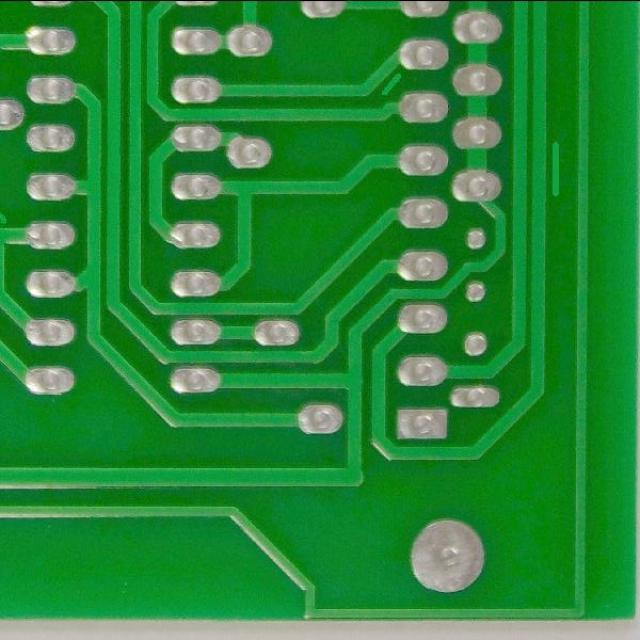

In [13]:
!python detect.py --weights runs/train/exp2/weights/best.pt --img 418 --conf 0.25 --source /content/pcbdataset/test/images/rotation_90_light_11_spurious_copper_09_2_600_jpg.rf.b61d373198687e769971e3a54ed58b47.jpg
Image(filename="/content/pcbdataset/test/images/rotation_90_light_11_spurious_copper_09_2_600_jpg.rf.b61d373198687e769971e3a54ed58b47.jpg",width=418)

In [18]:
cd /content/

/content


In [28]:
import shutil

# Replace 'your_folder_path' with the path to the folder you want to zip
folder_path = '/content/yolov5'

# Replace 'your_zip_file.zip' with the desired name for your zip file
zip_file_name = '/content/pcbmodel.zip'

shutil.make_archive(zip_file_name, 'zip', folder_path)


'/content/pcbmodel.zip.zip'

In [29]:
from google.colab import files
files.download("/content/pcbmodel.zip.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>